In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import io

from google.colab import files

# Assuming the file is named 'Customer_Data.csv'
uploaded = files.upload()
df= pd.read_csv(next(iter(uploaded.keys())))

Saving Customer_Data.csv to Customer_Data.csv


In [ ]:
# Assuming 'df' is your DataFrame containing the initial data
features = ['Net_ Purchase', 'Avg_Invoice_Row_No', 'Waste_Rate', 'Rejected_Rate', 'Avg_Purchase_In_Month']
X = df[features]

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)


In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Assign clusters back to the DataFrame
df['cluster'] = clusters


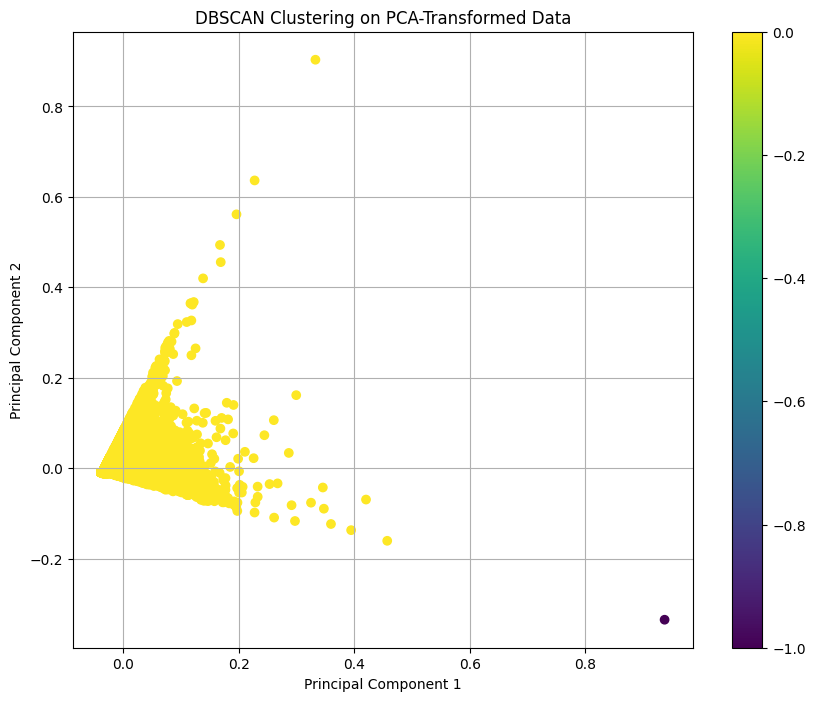

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', label=np.unique(df['cluster']))
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.grid(True)
plt.show()
